In [11]:
import numpy as np
import string
import random
import nltk
import pandas as pd
import matplotlib.pyplot as plt

import base64
import requests

from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt') #Using the Punkt tokenizer
nltk.download('wordnet') #Using the WordNet Dictionaty

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#Chattxt = open('https://raw.githubusercontent.com/DavidGlezGmz/Natural-Language-Processing-NLP-/main/Chatbot.txt', 'r', errors='ignore') # LEVEL 1
Chattxt = 'https://raw.githubusercontent.com/DavidGlezGmz/Natural-Language-Processing-NLP-/main/Chatbot.txt'
Chattxt = requests.get(Chattxt)
Chattxt = Chattxt.text

vehicle = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/Natural-Language-Processing-NLP-/main/vehicle.csv', header=None) # LEVEL 2
vehicle = vehicle[0]

noise = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/Natural-Language-Processing-NLP-/main/noise.csv', header=None) # LEVEL 2
noise = noise[0]

neighbor = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/Natural-Language-Processing-NLP-/main/neighbor.csv', header=None) # LEVEL 2
neighbor = neighbor[0]

In [13]:
neighbor

0     Its near freezing and I saw a dog chained up i...
1     Its a hot day and I see a dog in a car with it...
2     Ive seen litters of cats around the building b...
3     Found a dog huddled in an alley He has a colla...
4     I think my neighbor is engaging in illegal pit...
5     There are flyers on every car in the shopping ...
6     Knockoff purse dealer has set up shop on the 1...
7     You cant park a food truck along this resident...
8     A group of people are walking with glass conta...
9     The bar just closed but some patrons are tryin...
10    Drunk guy peed on a parked car Man peed on the...
11    Homeless people setting up tents under the ove...
12    Guy with a sign and squeegee at the intersecti...
13    Neighborhood kids out after curfew Kids across...
14    Kids at the park are skipping school Teens smo...
15    Teenagers are spray painting a store front A b...
16    Teenage house party going on in the suburbs Pa...
Name: 0, dtype: object

In [14]:
#raw_doc = Chattxt.read()
raw_doc = Chattxt
raw_doc = raw_doc.lower() #Converts text to lowercase

sent_tokens = nltk.sent_tokenize(raw_doc) #Converts doc to list of sentences
word_tokens = nltk.word_tokenize(raw_doc) #Converts doc to list of words

In [15]:
sent_tokens[:2]

['vehicle.', 'vehicle.']

In [16]:
word_tokens[:5]

['vehicle', '.', 'vehicle', '.', '[']

## Text Preprocessing

In [17]:
lemmer = nltk.stem.WordNetLemmatizer() #WordNet is a semantically-oriented dictionary of English included in NLTK

def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

## Defining the greeting function

In [18]:
GREET_INPUTS = ("hello", "hi", "greetings", "sup", "what's up", "hey", "wassup", "hola")
GREET_RESPONSES = ["Hello!, I am a virtual assistant to attend to your concern, how can I help you?",
                   "Greetings! It's an honor to serve you, how can I help you?",
                   "Hello, you are contacting the police server, how can we help you?"]

def greeting(sentence):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

## Response generation

In [19]:
# Generating response
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response = robo_response + "BOT: Sorry, I have been trained to deal with NON-EMERGENCY cases, please describe your concern:"
        return robo_response
    else:
        robo_response = "BOT: Option detected - " + robo_response + sent_tokens[idx-1]
        return robo_response

--------------------------------------------------------------------------------------------------------------------
			 NON-EMERGENCY POLICE ASSISTANCE LINE
	
To continue, please type one's of the followings options or chat with the assistance for more help
	
	 1. Vehicle
	 2. Noise
	 3. Neighbor
	
BOT: Greetings, Citizen! What's your concern?
1
		


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


BOT: Option detected - vehicle.
BOT: Do you want to continue? (Yes / No)
y
---------------------------------------------------------------------------------------------------------------------
		      ASSISTANCE FOR THE NON-URGENT CASE:  VEHICLE
			 14 Categories have been detected

BOT: Describe in detail how the events occurred: 
car going faster




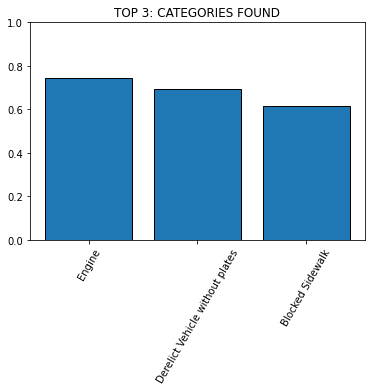



1.-  Engine 	 74.54429864883423 %
2.-  Derelict Vehicle without plates 	 69.37700510025024 %
3.-  Blocked Sidewalk 	 61.36559247970581 %

---------------------------------------------------------------------------------------------------------------------

BOT: To communicate with the department of  ENGINE click on the following link: https:www.police.com
BOT: Do you want to try again? (Yes / No)


KeyboardInterrupt: ignored

In [20]:
flag=True
print('--------------------------------------------------------------------------------------------------------------------')
print("\t\t\t NON-EMERGENCY POLICE ASSISTANCE LINE")
print('\t')
print("To continue, please type one's of the followings options or chat with the assistance for more help")
print('\t')
print("\t 1. Vehicle")
print("\t 2. Noise")
print("\t 3. Neighbor")
print('\t')
print("BOT: Greetings, Citizen! What's your concern?")

while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            print("\nBOT: You are welcome... Can I help you with something else? (Yes / No)")
            user_response = input()
            user_response=user_response.lower()

            if(user_response == 'yes' or user_response == 'y'):
              print("\nBOT: Tell me please: how can I help you?\n",end="")
              flag=True
            else:
              print("\nBOT: OK! It was a pleasure serving you, see you soon.")

              flag=False
        
      
        else:
            if(greeting(user_response)!=None):
                print('\t\t')
                print("BOT: "+greeting(user_response))
            else:
                print('\t\t')
                output=response(user_response)
                #print(response(user_response), end="")
                print(output)

                if (output == "BOT: Option detected - oh!, this is an emergency matter, please call #911."):
                  print("BOT: Sorry, I can only attend NON-EMERGENCIES, do you want to try again? (Yes / No)")
                  user_response = input()
                  user_response=user_response.lower()

                  if(user_response == 'yes' or user_response == 'y'):
                    print("\nBOT: Tell me please: What's your concern?\n",end="")
                    flag=True
                  else:
                    print("\nBOT: OK! It was a pleasure serving you, see you soon.")
                    flag=False

                if (output == "BOT: Sorry, I have been trained to deal with NON-EMERGENCY cases, please describe your concern:"):
                  flag=True

                else:
                  print("BOT: Do you want to continue? (Yes / No)")
                  user_response = input()
                  user_response=user_response.lower()

                  if(user_response == 'yes' or user_response == 'y'):
                    New_File = output
                    New_File = New_File[23:]
                    New_File = New_File[0:len(New_File)-1]
                    New_File = str(New_File)
                    print('---------------------------------------------------------------------------------------------------------------------')
                    print("\t\t      ASSISTANCE FOR THE NON-URGENT CASE: ", New_File.upper())

                    if New_File == 'vehicle':
                      New_File = vehicle
                      len_New_File = len(New_File)
                      print("\t\t\t", len_New_File, 'Categories have been detected')
                      Category = ["Speeding", "Stoplights", "Congestion", "Drag Racing","Specific Lane Violation",
                                  "Fire Hydrant", "Blocked Sidewalk", "Commercial Overnight", "Double-parked",
                                  "Posted sign", "Driveway", "Derelict Vehicle with plates", "Derelict Vehicle without plates",
                                  "Engine", "Horn"]

                    else:
                      if New_File == 'noise':
                        New_File = noise
                        len_New_File = len(New_File)
                        print("\t\t\t", len_New_File, 'Categories have been detected')
                        Category = ["Music", "Fireworks", "Voice", "Banging","Engine", "Horn"]

                      else: 
                        if New_File == 'neighbor':
                          New_File = neighbor
                          len_New_File = len(New_File)
                          print("\t\t\t", len_New_File, 'Categories have been detected')
                          Category = ["Chained Up", "In car", "Neglect", "No shelter","Torture",
                                      "Posting Ads (on cars)", "Unlicensed vending", "Prohibited vending", "In public",
                                      "After hours", "Public Urination", "Encampment", "Panhandling",
                                      "Curfew", "Truancy", "Graffiti", "Underage Drinking"]

                    # Tokenization of each document
                    tokenized_sent = []
                    for s in New_File:
                        tokenized_sent.append(word_tokenize(s.lower()))
                    
                    tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]

                    ## Train doc2vec model
                    model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 1000)
                    ## Print model vocabulary
                    model.wv.vocab

                    print("\nBOT: Describe in detail how the events occurred: ")
                    user_response = input()
                    user_response=user_response.lower()
                    test_doc = word_tokenize(user_response)
                    test_doc_vector = model.infer_vector(test_doc)
                    model.docvecs.most_similar(positive = [test_doc_vector])

                    Output = model.docvecs.most_similar(positive = [test_doc_vector])
                    Top3 = Output[0:3]
                    Names = [Category[Top3[0][0]],Category[Top3[1][0]],Category[Top3[2][0]]]
                    Porcentages = [float(Top3[0][1]),float(Top3[1][1]),float(Top3[2][1])]

                    print("\n")
                    plt.bar(range(3), Porcentages, edgecolor='black')
                    plt.xticks(range(3), Names, rotation=60)
                    plt.title("TOP 3: CATEGORIES FOUND")
                    plt.ylim(0, 1)
                    plt.show()
                    
                    print("\n")
                    print("1.- ", Category[Top3[0][0]],"\t", (Top3[0][1])*100, "%")
                    print("2.- ", Category[Top3[1][0]],"\t", (Top3[1][1])*100, "%")
                    print("3.- ", Category[Top3[2][0]],"\t", (Top3[2][1])*100, "%")

                    print('\n---------------------------------------------------------------------------------------------------------------------')
                    print("\nBOT: To communicate with the department of ", Category[Top3[0][0]].upper(), "click on the following link: https:www.police.com")
                    print("BOT: Do you want to try again? (Yes / No)")
                    user_response = input()
                    user_response=user_response.lower()
                    if(user_response == 'yes' or user_response == 'y'):
                      print("\nBOT: Tell me please: What's your concern?\n",end="")
                      flag=True
                    else:
                      print("\nBOT: OK! It was a pleasure serving you, see you soon.")
                      flag=False
                  else:
                    print("\nBOT: OK!, no problem, let's try again: What's your concern?")
                    flag=True
                  #sent_tokens.remove(user_response)
    else:
        flag=False
        print("\nBOT: Bye! It was a pleasure serving you, see you soon.")